請用鳶尾花資料集，並用全部的欄位和資料來做預測。 請用管道器，資料要進
行標準化、主成分分析（n_components=2）和 K 最近鄰預測正確率、混亂矩
陣及綜合報告。


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
# 載入鳶尾花資料集
iris = load_iris()
X = iris.data
y = iris.target

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 建立管道器
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # 標準化資料
    ('pca', PCA(n_components=2)),  # 主成分分析
    ('knn', KNeighborsClassifier())  # K最近鄰預測
])

# 訓練模型
pipeline.fit(X_train, y_train)

# 預測測試集
y_pred = pipeline.predict(X_test)

# 評估模型
print('正確率：', accuracy_score(y_test, y_pred).round(2))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.94
混亂矩陣
[[19  0  0]
 [ 0 14  1]
 [ 0  2 14]]
綜合報告
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.88      0.93      0.90        15
           2       0.93      0.88      0.90        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



承第 1 題的資料，我們要做的是鄰居數目 n_neighbors 選擇的實驗，其範圍為
1 到 101，間距為 10，用(range(1,101,10))，請分別用訓練集和測試集資料，
計算其整體正確率及繪圖，並解釋其結果。

鄰居數目 1 下的訓練集準確率：1.00
鄰居數目 1 下的測試集準確率：0.96
鄰居數目 11 下的訓練集準確率：0.95
鄰居數目 11 下的測試集準確率：0.98
鄰居數目 21 下的訓練集準確率：0.92
鄰居數目 21 下的測試集準確率：0.98
鄰居數目 31 下的訓練集準確率：0.87
鄰居數目 31 下的測試集準確率：0.88
鄰居數目 41 下的訓練集準確率：0.87
鄰居數目 41 下的測試集準確率：0.84
鄰居數目 51 下的訓練集準確率：0.85
鄰居數目 51 下的測試集準確率：0.86
鄰居數目 61 下的訓練集準確率：0.85
鄰居數目 61 下的測試集準確率：0.80
鄰居數目 71 下的訓練集準確率：0.44
鄰居數目 71 下的測試集準確率：0.44
鄰居數目 81 下的訓練集準確率：0.39
鄰居數目 81 下的測試集準確率：0.36
鄰居數目 91 下的訓練集準確率：0.35
鄰居數目 91 下的測試集準確率：0.30


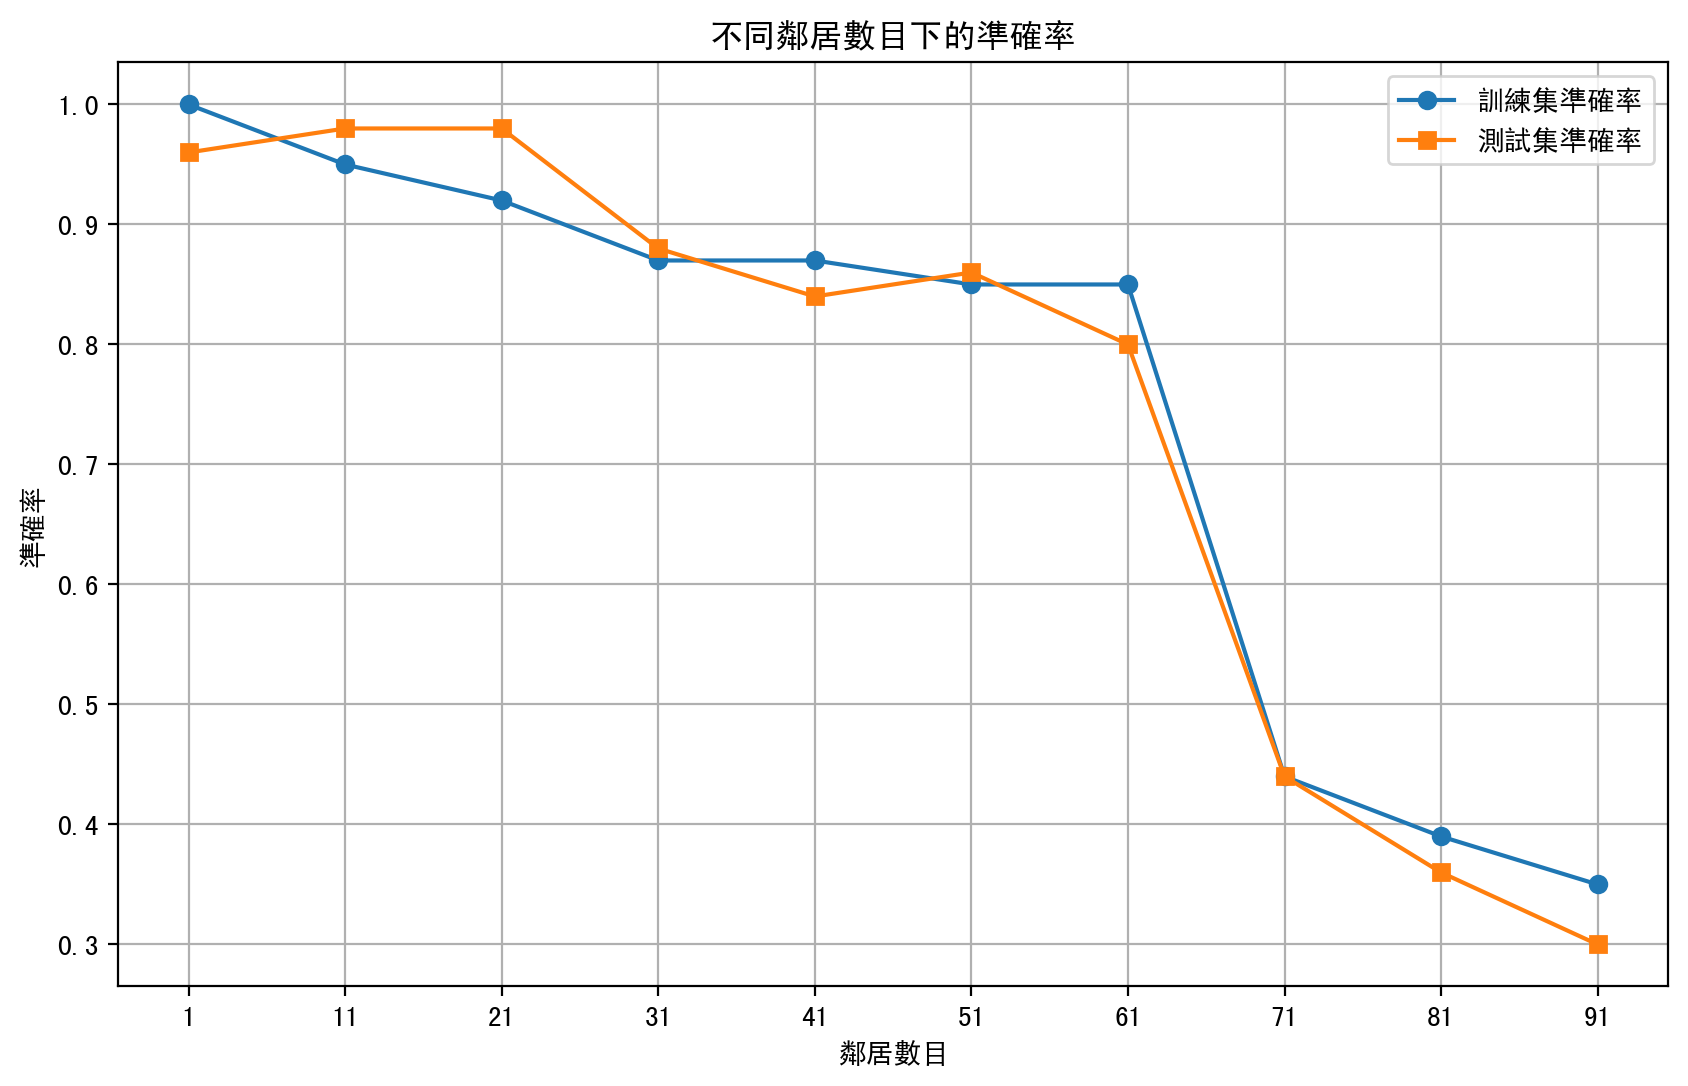

In [ ]:
import matplotlib.pyplot as plt
X = iris.data
y = iris.target

# 定義範圍和間距
neighbors = range(1, 101, 10)

# 儲存訓練集和測試集的準確率
train_accuracies = []
test_accuracies = []

for n in neighbors:
    # 建立管道
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # 標準化
        ('knn', KNeighborsClassifier(n_neighbors=n))  # K最近鄰
    ])

    # 訓練模型
    pipe.fit(X_train, y_train)

    # 計算訓練集和測試集的準確率
    train_accuracy = pipe.score(X_train, y_train)
    test_accuracy = pipe.score(X_test, y_test)

    # 儲存準確率
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

     # 顯示準確率
    print(f"鄰居數目 {n} 下的訓練集準確率：{train_accuracy:.2f}")
    print(f"鄰居數目 {n} 下的測試集準確率：{test_accuracy:.2f}")

# 繪製準確率曲線
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracies, label='訓練集準確率', marker='o')
plt.plot(neighbors, test_accuracies, label='測試集準確率', marker='s')
plt.xlabel('鄰居數目')
plt.ylabel('準確率')
plt.title('不同鄰居數目下的準確率')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

在訓練集上隨著鄰居數目的增加，準確率可能會下降，這是因為模型變得更複雜，可能會出現欠擬合的情況。而在測試集上，準確率可能會在一定範圍內上升，然後趨於穩定或下降，這是因為模型在適當的鄰居數目下達到了最佳的泛化性能。你可以根據準確率曲線來選擇最適合的鄰居數目，以獲得較好的模型性能。

In [ ]:
# 中文處理
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"

fm.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
# 這一行能讓字體變得清晰
%config InlineBackend.figure_format = 'retina'

--2024-05-13 08:49:14--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.21.1.127, 172.67.129.58, 2606:4700:3031::ac43:813a, ...
Connecting to www.wfonts.com (www.wfonts.com)|104.21.1.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  35.9MB/s    in 0.3s    

2024-05-13 08:49:15 (35.9 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
  inflating: chinese.simhei.ttf      
  inflating: SimHei.ttf              
  inflating: sharefonts.net.txt      
